# Spam ham project using BOW

In this project we will be using BOW and Machine learning algorithms to do spam/ham classification

In [1]:
import pandas as pd

messages=pd.read_csv("C:\\NLP\\SpamData\\spam.csv",encoding="latin-1")

messages

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [2]:
messages.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)
messages.rename(columns={"v1":"label","v2":"message"},inplace=True)
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


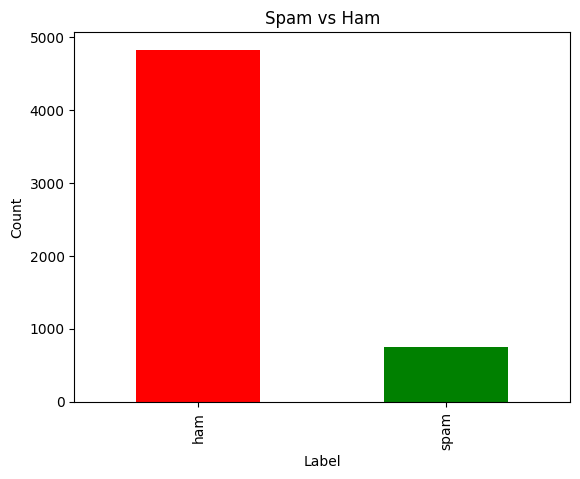

In [3]:
# visualization of the data
import matplotlib.pyplot as plt
messages["label"].value_counts().plot(kind="bar",color=["red","green"])
plt.title("Spam vs Ham")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# Data Cleaning and preprocessing

In [4]:
!pip install nltk

In [5]:
import re
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\owais\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [7]:
corpus=[]
for i in range(0,len(messages)):
    message=re.sub("[^a-zA-Z]"," ",messages["message"][i])
    message=message.lower()
    message=message.split()
    message=[ps.stem(word) for word in message if not word in set(stopwords.words("english"))]
    message=" ".join(message)
    corpus.append(message)

In [8]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

# Create Bag of words

In [9]:
# create vector from the corpus
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500,ngram_range=(1,2))
cv

CountVectorizer(max_features=2500, ngram_range=(1, 2))

In [10]:
# independent feature
x=cv.fit_transform(corpus).toarray()

In [11]:
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=1000000, formatter={'float_kind':lambda x: "%.3f" % x})

x

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0

In [12]:
cv.get_feature_names_out()

array(['aathi', 'abiola', 'abl', 'abt', 'ac', 'acc', 'accept', 'access', 'accid', 'accident', 'account', 'account statement', 'across', 'across sea', 'action', 'activ', 'actual', 'ad', 'add', 'addict', 'address', 'admir', 'admir look', 'ador', 'adult', 'advanc', 'advic', 'affair', 'affect', 'aft', ..., 'yan jiu', 'yar', 'yar lor', 'yay', 'ye', 'ye pleas', 'ye princess', 'ye savamob', 'ye see', 'yeah', 'yeah got', 'yeah probabl', 'year', 'year old', 'yep', 'yest', 'yesterday', 'yet', 'yetund', 'yiju', 'ym', 'yo', 'yo yo', 'yoga', 'yogasana', 'yr', 'yr prize', 'yun', 'yup', 'zed'], dtype=object)

In [13]:
cv.get_feature_names_out().shape

(2500,)

In [14]:
cv.vocabulary_

{'go': 801,
 'point': 1605,
 'crazi': 452,
 'avail': 123,
 'bugi': 230,
 'great': 855,
 'world': 2430,
 'la': 1084,
 'cine': 349,
 'got': 843,
 'wat': 2338,
 'ok': 1472,
 'lar': 1096,
 'joke': 1051,
 'wif': 2395,
 'free': 723,
 'entri': 617,
 'wkli': 2419,
 'comp': 400,
 'win': 2400,
 'fa': 653,
 'cup': 466,
 'final': 688,
 'st': 1961,
 'may': 1265,
 'text': 2074,
 'receiv': 1699,
 'question': 1664,
 'std': 1976,
 'txt': 2203,
 'rate': 1679,
 'appli': 86,
 'free entri': 728,
 'entri wkli': 619,
 'std txt': 1977,
 'txt rate': 2209,
 'rate appli': 1680,
 'dun': 577,
 'say': 1795,
 'earli': 583,
 'alreadi': 55,
 'nah': 1386,
 'think': 2100,
 'goe': 823,
 'usf': 2273,
 'live': 1163,
 'around': 99,
 'though': 2110,
 'freemsg': 735,
 'hey': 921,
 'darl': 483,
 'week': 2363,
 'word': 2425,
 'back': 140,
 'like': 1148,
 'fun': 755,
 'still': 1979,
 'tb': 2052,
 'xxx': 2465,
 'send': 1826,
 'even': 627,
 'brother': 220,
 'speak': 1942,
 'treat': 2178,
 'per': 1543,
 'request': 1733,
 'mell': 12

In [32]:
# dependent feature-->label
y=pd.get_dummies(messages["label"])

In [33]:
y

,ham,spam
0,True,False
1,True,False
2,False,True
3,True,False
4,True,False
...,...,...
5567,False,True
5568,True,False
5569,True,False
5570,True,False


In [34]:
y=y.iloc[:,0].values

In [35]:
y

array([ True,  True, False,  True,  True, False,  True,  True, False, False,  True, False, False,  True,  True, False,  True,  True,  True, False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True, ...,  True,  True,  True,  True,  True, False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False, False,  True,  True,  True,  True])

In [36]:
y.shape

(5572,)

# Model Training

In [37]:
# Training and Testing the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
x_train.shape

(4457, 2500)

In [39]:
x_test.shape

(1115, 2500)

In [40]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB().fit(x_train,y_train)

In [41]:
classifier

MultinomialNB()

In [42]:
# prediction on the test data
y_pred=classifier.predict(x_test)

In [44]:
y_pred.shape

(1115,)

In [46]:
#checking the accuracy of the model
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))

[[137  13]
 [  7 958]]


In [47]:
print(accuracy_score(y_test,y_pred))

0.9820627802690582


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.95      0.91      0.93       150
        True       0.99      0.99      0.99       965

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

